In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
suv = pd.read_csv('suv_data.csv')

In [3]:
suv.shape

(400, 5)

In [4]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
suv.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
suv.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
suv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

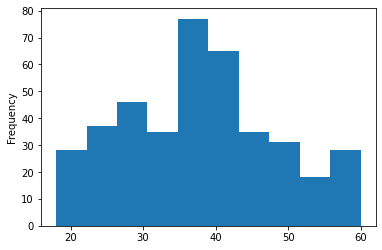

In [8]:
 suv['Age'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

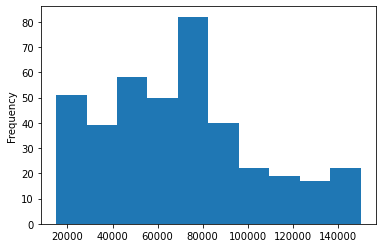

In [9]:
 suv['EstimatedSalary'].plot.hist() 

In [10]:
  suv.groupby(['Gender']) ['Purchased'].count()   

Gender
Female    204
Male      196
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

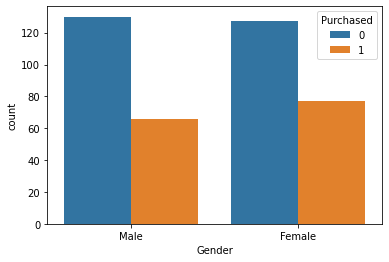

In [11]:
sns.countplot(x= 'Gender', data = suv, hue = 'Purchased' )

In [12]:
X=suv.drop(columns={'Purchased','User ID','Gender'})
Y= suv['Purchased']

In [13]:
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [14]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25)  # (random_state=42, shuffle=True)

In [169]:
#scaling the data

In [170]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)   
X_test = sc.fit_transform(X_test)

In [171]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [172]:
Prediction = LR.predict(X_test)

In [173]:
accuracy = accuracy_score(Y_test, Prediction) *100
print('accuracy is: {}%'.format(accuracy))

accuracy is: 85.0%


Give input and evaluate the outcome

In [186]:
input_data = (46, 28000)

In [187]:
input_array=np.array(input_data)
print(input_array)

[   46 28000]


In [188]:
input_array_reshape=input_array.reshape(1,-1)

In [177]:
#inputdata = sc.fit_transform(input_array_reshape) 

In [189]:
result = LR.predict(inputdata)

In [190]:
if result == 1: 
    print ("can purchase SUV")
else: 
    print ("can not purchase SUV")


can not purchase SUV
